In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Reading The Data**

In [2]:
df = pd.read_csv(r"/kaggle/input/students-performance-dataset/Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# **EDA & Preprocessing**

**Gathering information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


**Checking for null values**

In [5]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

**Converting numerical data to categorical**

In [6]:
l = ['Caucasian', 'African American', 'Asian', 'Other']
df['Gender'] = df['Gender'].map(lambda x:'male' if x == 0 else 'female')
df['Ethnicity'] = df['Ethnicity'].map(lambda x: l[x])
df['Tutoring'] = df['Tutoring'].map(lambda x:'Yes' if x == 1 else 'No')
df['Extracurricular'] = df['Extracurricular'].map(lambda x:'Yes' if x == 1 else 'No')
df['Sports'] = df['Sports'].map(lambda x:'Yes' if x == 1 else 'No')
df['Music'] = df['Music'].map(lambda x:'Yes' if x == 1 else 'No')
df['Volunteering'] = df['Volunteering'].map(lambda x:'Yes' if x == 1 else 'No')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,female,Caucasian,2,19.833723,7,Yes,2,No,No,Yes,No,2.929196,2.0
1,1002,18,male,Caucasian,1,15.408756,0,No,1,No,No,No,No,3.042915,1.0
2,1003,15,male,Asian,3,4.210570,26,No,2,No,No,No,No,0.112602,4.0
3,1004,17,female,Caucasian,3,10.028829,14,No,3,Yes,No,No,No,2.054218,3.0
4,1005,17,female,Caucasian,2,4.672495,17,Yes,3,No,No,No,No,1.288061,4.0


# **Visualization**

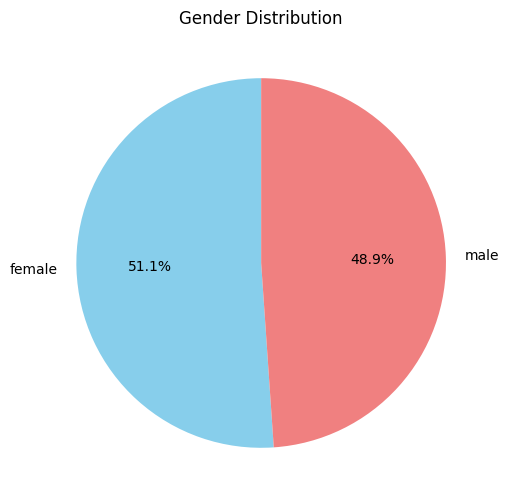

In [7]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

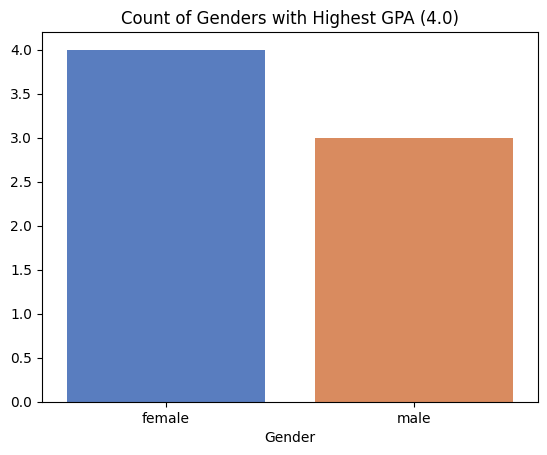

In [8]:
genders_with_max_gpa = df.loc[df['GPA']==df['GPA'].max(), 'Gender'].value_counts()
sns.barplot(x=genders_with_max_gpa.index, y=genders_with_max_gpa.values, palette='muted')
plt.title(f'Count of Genders with Highest GPA ({df["GPA"].max()})')
plt.show()

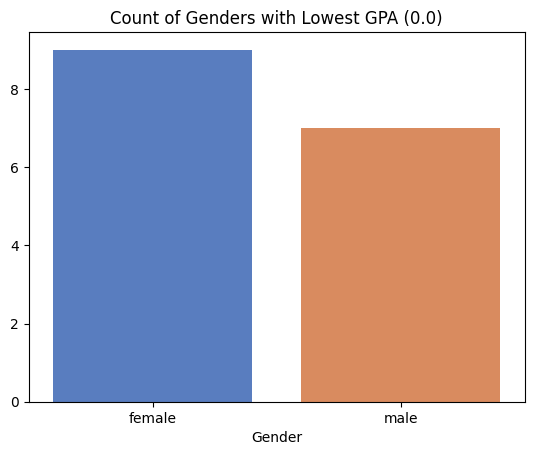

In [9]:
genders_with_max_gpa = df.loc[df['GPA']==df['GPA'].min(), 'Gender'].value_counts()
sns.barplot(x=genders_with_max_gpa.index, y=genders_with_max_gpa.values, palette='muted')
plt.title(f'Count of Genders with Lowest GPA ({df["GPA"].min()})')
plt.show()

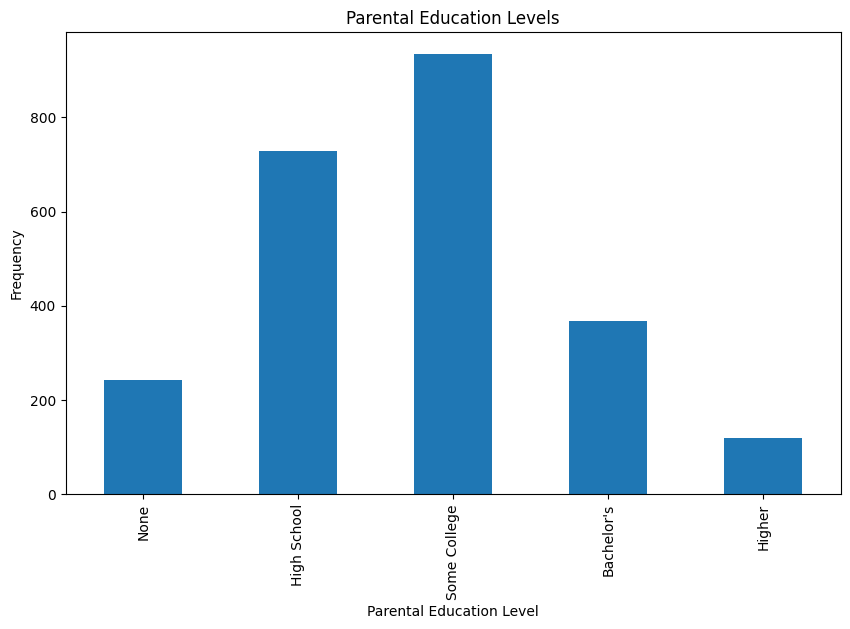

In [10]:
plt.figure(figsize=(10, 6))
parental_education_labels = ['None', 'High School', 'Some College', "Bachelor's", 'Higher']
df['ParentalEducation'].value_counts().sort_index().plot(kind='bar')
plt.title('Parental Education Levels')
plt.xlabel('Parental Education Level')
plt.ylabel('Frequency')
plt.xticks(ticks=range(5), labels=parental_education_labels)
plt.show()

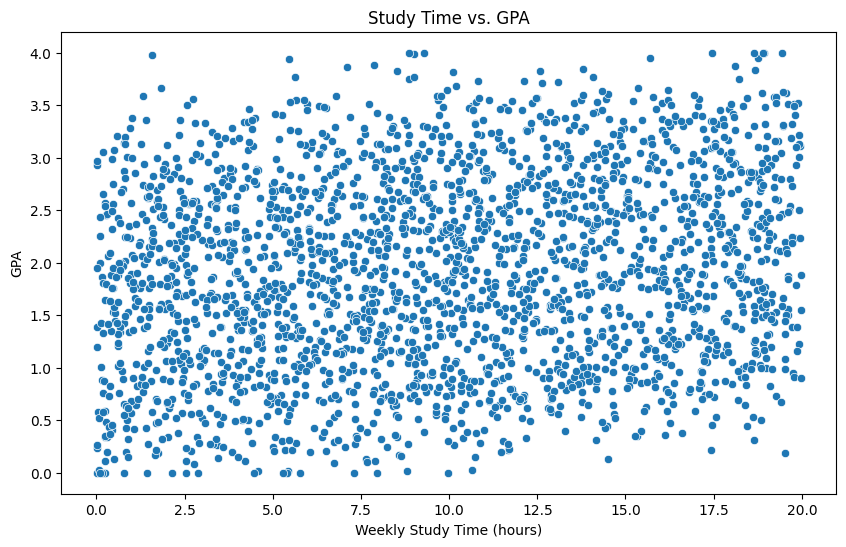

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title('Study Time vs. GPA')
plt.xlabel('Weekly Study Time (hours)')
plt.ylabel('GPA')
plt.show()

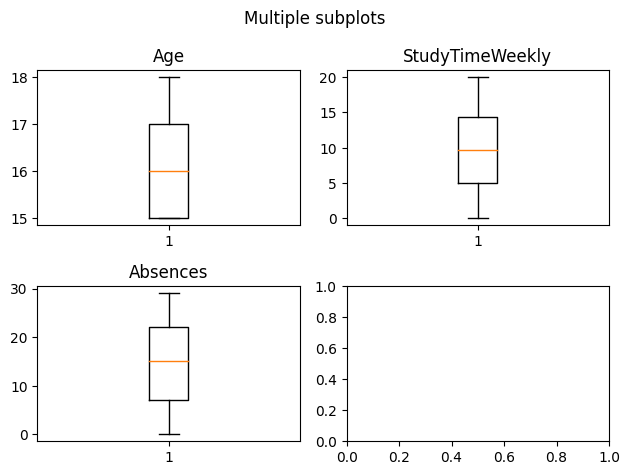

In [12]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(df['Age'])
axs[0, 0].set_title('Age')

axs[0, 1].boxplot(df['StudyTimeWeekly'])
axs[0, 1].set_title('StudyTimeWeekly')

axs[1, 0].boxplot(df['Absences'])
axs[1, 0].set_title('Absences')


fig.suptitle('Multiple subplots')
plt.tight_layout()
plt.show()

**Dropping unneccesary columns**

In [13]:
df.drop(columns=['StudentID','Ethnicity','GPA'],inplace=True)
df.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,female,2,19.833723,7,Yes,2,No,No,Yes,No,2.0
1,18,male,1,15.408756,0,No,1,No,No,No,No,1.0
2,15,male,3,4.210570,26,No,2,No,No,No,No,4.0
3,17,female,3,10.028829,14,No,3,Yes,No,No,No,3.0
4,17,female,2,4.672495,17,Yes,3,No,No,No,No,4.0


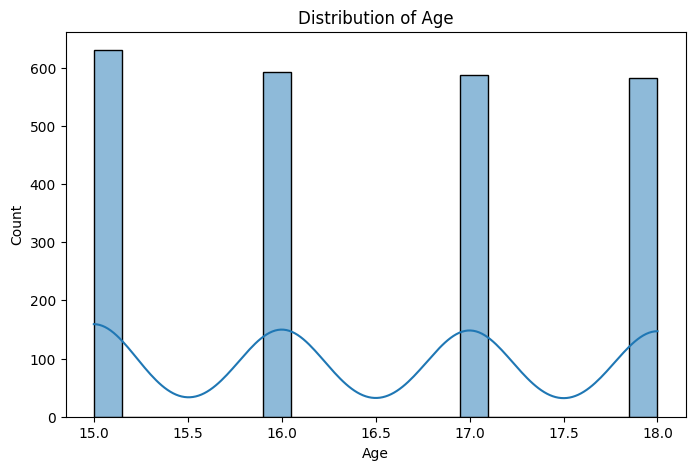

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, bins=20)
plt.title(f'Distribution of Age')
plt.show()

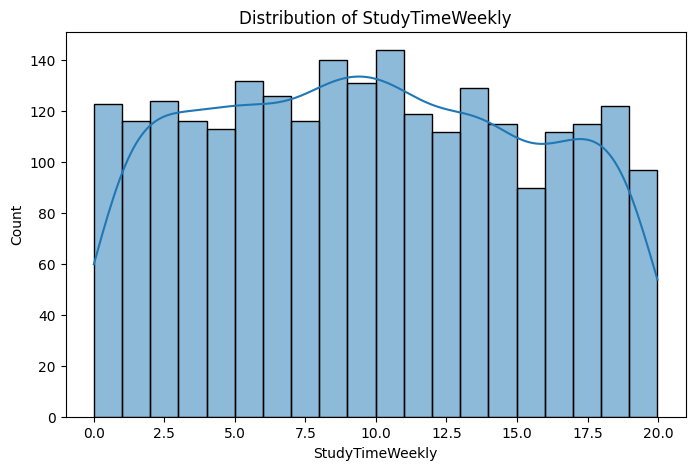

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='StudyTimeWeekly', kde=True, bins=20)
plt.title(f'Distribution of StudyTimeWeekly')
plt.show()

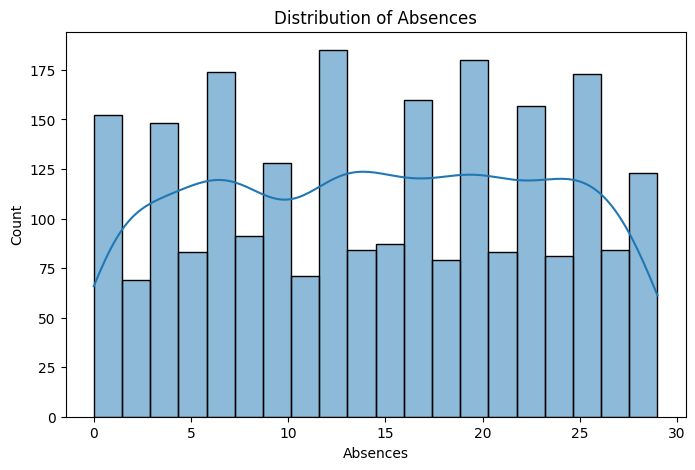

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Absences', kde=True, bins=20)
plt.title(f'Distribution of Absences')
plt.show()

**Correlation**

In [17]:
corr = df.corr(numeric_only=True)
corr['GradeClass'].sort_values(ascending=False)

GradeClass           1.000000
Absences             0.728633
ParentalEducation    0.041031
Age                 -0.006250
StudyTimeWeekly     -0.134131
ParentalSupport     -0.136823
Name: GradeClass, dtype: float64

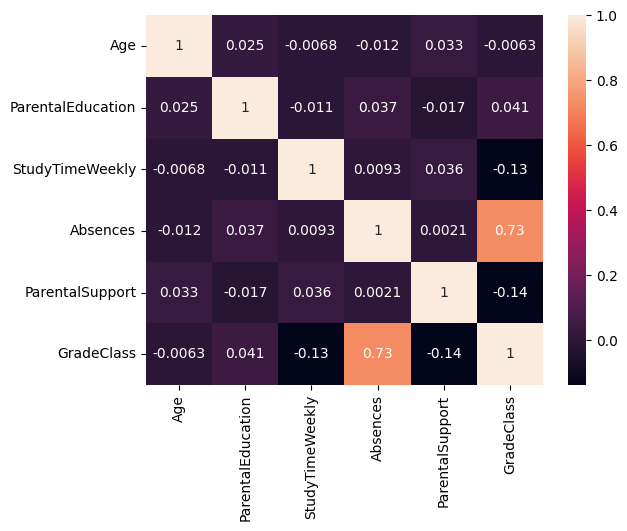

In [18]:
sns.heatmap(corr,annot=True)
plt.show()

# **Modeling**

**Splitting the data**

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df['Gender'], test_size=0.2, random_state=42)

**Pipline & Encoding**

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_cols = ['Age','StudyTimeWeekly', 'Absences']
cat_cols = ['Sports', 'Volunteering', 'ParentalSupport', 'Music', 'Extracurricular','Gender', 'Tutoring']

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

X_train_proccessed = preprocessor.fit_transform(X_train)
X_test_proccessed = preprocessor.transform(X_test)

**Selecting models**

In [21]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
}

# **Evaluation**

Decision Tree accuracy: 0.62
Random Forest accuracy: 0.71
K-Nearest Neighbors accuracy: 0.61
Logistic Regression accuracy: 0.73
Support Vector Machine accuracy: 0.73


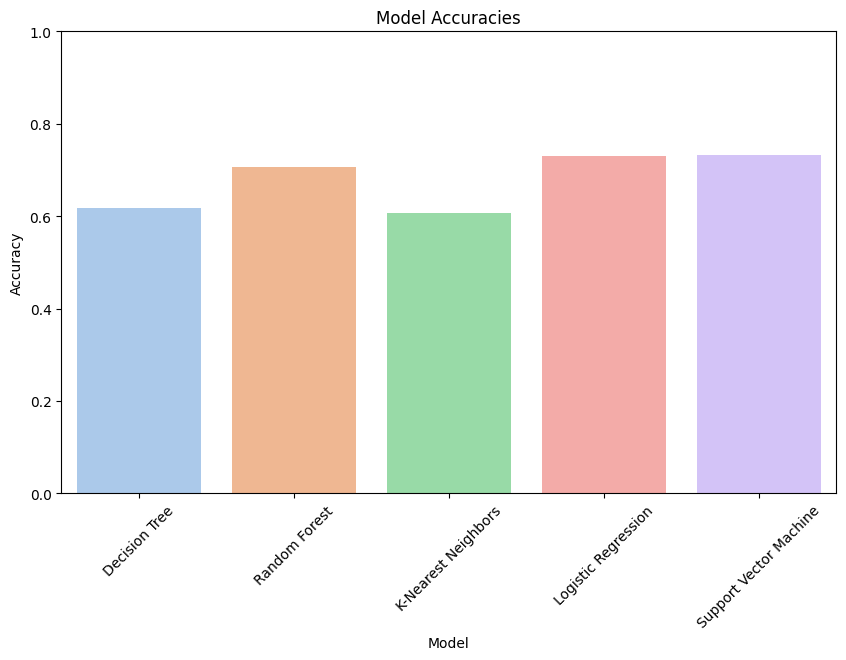

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_names = []
accuracies = []

for name, clf in models.items():
    clf.fit(X_train_proccessed, y_train)
    score = clf.score(X_test_proccessed, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='pastel')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()



In [23]:
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test_proccessed)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plt.show()

Evaluating Decision Tree...
Classification Report:
              precision    recall  f1-score   support

         0.0       0.23      0.32      0.27        22
         1.0       0.46      0.47      0.46        55
         2.0       0.44      0.35      0.39        84
         3.0       0.30      0.39      0.34        62
         4.0       0.86      0.82      0.84       256

    accuracy                           0.62       479
   macro avg       0.46      0.47      0.46       479
weighted avg       0.64      0.62      0.62       479

Evaluating Random Forest...
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.27      0.35        22
         1.0       0.55      0.55      0.55        55
         2.0       0.57      0.50      0.53        84
         3.0       0.42      0.48      0.45        62
         4.0       0.86      0.90      0.88       256

    accuracy                           0.71       479
   macro avg       0.58      